In [191]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision

In [192]:
# 读取数据
trans = torchvision.transforms.ToTensor() # 通过ToTensor将图像数据变换成float32格式
mnist_train = torchvision.datasets.MNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.MNIST(
    root="../data", train=False, transform=trans, download=True)

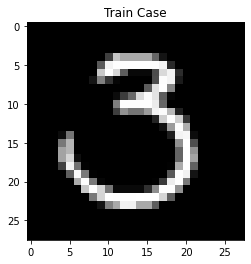

对应的答案是3


In [193]:
bachSize = 50
train_dataloader = DataLoader(mnist_train, batch_size = bachSize, shuffle = True)
test_dataloader = DataLoader(mnist_test, batch_size = bachSize, shuffle = True)
# train_dataloader存储数据格式为[[50个图片（28x28）],[50个答案]]

from matplotlib import pyplot

for i in train_dataloader:
    pyplot.imshow(i[0][0].reshape(28,28), cmap="gray") # 输出图像
    pyplot.title("Train Case")
    pyplot.show()
    print(f"对应的答案是{i[1][0]}")
    break

# train格式为[[数据],[答案]]

In [209]:
class Learning(nn.Module):

    def __init__(self):
        super(Learning, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 200)
        self.fc3 = nn.Linear(200, 400)
        self.out = nn.Linear(400, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)
        return x


net = Learning()
loss_func = nn.CrossEntropyLoss()

In [210]:
def start(epochs,learningrate):
    
    for i in range(epochs):
        net.train()
        for data, label in train_dataloader:
            data = data.reshape(bachSize,784)
            out = net(data)
            loss = loss_func(out, label)
            optimizer = optim.Adam(net.parameters(), lr=learningrate)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        net.eval()
        total_loss = 0
        with torch.no_grad():
            for data, label in test_dataloader:
                data = data.reshape(bachSize,784)
                out = net(data)
                loss = loss_func(out, label)
                total_loss += loss
        print(f"epoch {i+1} loss {total_loss/len(test_dataloader)}")

start(epochs = 30,learningrate = 0.01)


epoch 1 loss 2.075618267059326
epoch 2 loss 1.0330337285995483
epoch 3 loss 1.8944175243377686
epoch 4 loss 6.5770039558410645
epoch 5 loss 2.3094708919525146
epoch 6 loss 1.6775952577590942
epoch 7 loss 1.388811469078064
epoch 8 loss 1.3389027118682861
epoch 9 loss 1.6393741369247437
epoch 10 loss 1.680294156074524
epoch 11 loss 1.9139045476913452
epoch 12 loss 2.7127959728240967
epoch 13 loss 1.9843940734863281
epoch 14 loss 2.9275472164154053
epoch 15 loss 2.9388976097106934
epoch 16 loss 2.4728496074676514
epoch 17 loss 3.335465908050537
epoch 18 loss 2.856302499771118
epoch 19 loss 2.8018088340759277
epoch 20 loss 2.519913673400879
epoch 21 loss 2.9523956775665283
epoch 22 loss 4.556051254272461
epoch 23 loss 3.134025812149048
epoch 24 loss 2.9938271045684814
epoch 25 loss 4.09746789932251
epoch 26 loss 5.829850673675537
epoch 27 loss 3.8257851600646973
epoch 28 loss 4.769731521606445
epoch 29 loss 3.980663776397705
epoch 30 loss 4.42471981048584


In [215]:
start(epochs = 1,learningrate = 0.01)

epoch 1 loss 4.5534749031066895


In [216]:
def test():
    total = 0
    correct = 0
    net.eval()
    with torch.no_grad():
        for data, label in test_dataloader:
            correct_ans = label.tolist()
            t = net(data.reshape(bachSize,784))
            predict_ans = torch.max(t.data, 1).indices.tolist()
            total += label.size(0)
            for i in range(len(correct_ans)):
                if correct_ans[i] == predict_ans[i]:
                    correct += 1
    print(f"正确率为{(correct/total)*100}%")

test()

正确率为97.14%


正确答案是4，预测答案是4


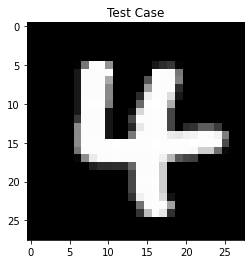

正确答案是3，预测答案是3


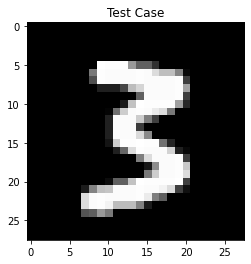

正确答案是4，预测答案是4


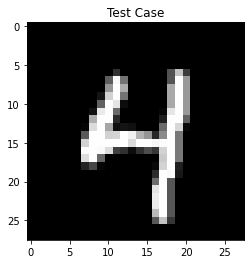

In [212]:
def show():
    for i in range(3):
        data, label = test_dataloader.__iter__().__next__()
        data = data.reshape(bachSize,784)
        out = net(data)
        predict_ans = torch.max(out.data, 1).indices.tolist()
        print(f"正确答案是{label[0]}，预测答案是{predict_ans[0]}")
        pyplot.imshow(data[0].reshape(28,28), cmap="gray")
        pyplot.title("Test Case")
        pyplot.show()
show()